In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
os.chdir(module_path)

In [5]:
import pandas as pd

# Submission Analyze. Pay attention to mean and std.

In [45]:
df = pd.read_csv('data/submissions/Submission_2017-10-01 17:35:59.csv')

In [39]:
df = df['201610']

In [42]:
df.describe()

,ParcelId,201610,201611,201612,201710,201711,201712
count,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06
mean,1.332586e+07,1.093512e-02,1.093512e-02,1.093512e-02,1.093512e-02,1.093512e-02,1.093512e-02
std,7.909966e+06,2.372010e-02,2.372010e-02,2.372010e-02,2.372010e-02,2.372010e-02,2.372010e-02
min,1.071172e+07,-1.500000e+00,-1.500000e+00,-1.500000e+00,-1.500000e+00,-1.500000e+00,-1.500000e+00
25%,1.164371e+07,4.800000e-03,4.800000e-03,4.800000e-03,4.800000e-03,4.800000e-03,4.800000e-03
50%,1.254509e+07,1.100000e-02,1.100000e-02,1.100000e-02,1.100000e-02,1.100000e-02,1.100000e-02
75%,1.409712e+07,1.760000e-02,1.760000e-02,1.760000e-02,1.760000e-02,1.760000e-02,1.760000e-02
max,1.696019e+08,1.500000e+00,1.500000e+00,1.500000e+00,1.500000e+00,1.500000e+00,1.500000e+00


# Model feature importance analyze

In [6]:
import features.utils

In [7]:
from sklearn.linear_model import Ridge
from models.LinearModel import *

In [8]:
model = features.utils.read_aux('BestRidgeModels')

Object load from features/aux_pickles/BestRidgeModels.pickle


In [9]:
len(model[0].model.coef_)

141

In [9]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

<Container object of 120 artists>

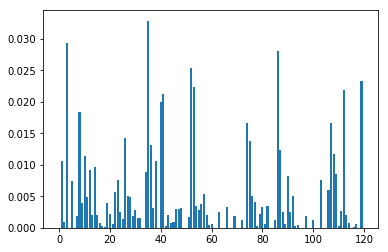

In [11]:
plt.bar(np.arange(120),abs(model[0].model.coef_))

In [10]:
from interface import *

/home/peter/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
train_df, _, _ = load_full_data('config_linearridge2')

name: config_linearridge2
Model: <class 'models.LinearModel.RidgeRegressor'>
before_fill: 1
original: 27
generated: 52
clean_na: True
training_params: {'model_params': {'alpha': 2.22721163144679, 'fit_intercept': False, 'random_state': 42, 'solver': 'sparse_cg', 'tol': 0.0025287182085385923}, 'FOLDS': 3, 'record': False, 'outliers_up_pct': 97, 'outliers_lw_pct': 5, 'pca_components': -1, 'scaling': True}
tuning_params: {'parameter_space': {'model_params': {'alpha': <hyperopt.pyll.base.Apply object at 0x7f2cf1ef2400>, 'fit_intercept': <hyperopt.pyll.base.Apply object at 0x7f2cf1ef2518>, 'solver': <hyperopt.pyll.base.Apply object at 0x7f2cf1ef26a0>, 'tol': <hyperopt.pyll.base.Apply object at 0x7f2cf1ef2940>, 'random_state': 42}, 'outliers_up_pct': 97, 'outliers_lw_pct': 5, 'scaling': True, 'pca_components': -1}, 'max_evals': 500}
Feature engineering
Using cleaned prop
(2973780, 142)
Load training data...


In [12]:
df=pd.DataFrame({'feature': train_df.columns[3:], 'coef': abs(model[0].model.coef_)})

# Best features, when input contains Geo features

In [15]:
df.sort_values(['coef'], ascending=False).head(100)

,coef,feature
35,0.032896,error_rate_bathroom
3,0.029368,calculatedfinishedsquarefeet
86,0.028130,fullbathcnt_fips_census_block_mean
52,0.025414,fullbathcnt_fips_census_1_mean
119,0.023314,total_rooms
53,0.022403,fullbathcnt_fips_census_1_std
112,0.021952,ratio_living_area_2
41,0.021257,bathroomcnt_fips_census_1_std
40,0.019913,bathroomcnt_fips_census_1_mean
8,0.018347,garagecarcnt


## It seems bathroom-related features are important.

# Best features, when input does not contain Geo features

In [13]:
df.sort_values(['coef'], ascending=False).head(100)

,coef,feature
25,0.026811,taxamount
3,0.026184,calculatedfinishedsquarefeet
97,0.021301,ratio_living_area_2
132,0.020856,logerror_fips_census_1_mean
114,0.014780,logerror_regionidzip_mean
24,0.013951,landtaxvaluedollarcnt
22,0.012669,structuretaxvaluedollarcnt
28,0.012664,average_bedroom_size
120,0.012366,logerror_regionidcity_mean
108,0.012207,logerror_regionidneighborhood_mean


## tax and target are important features.